<a href="https://colab.research.google.com/github/esthernwagborogu/Adidas-Sales-Data/blob/main/Financial_literacy_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#upload the dataset from the drive
FILEPATH = '/content/drive/MyDrive/financial_literacy_dataset.xlsx'
dataframes = pd.read_excel(FILEPATH)


In [6]:
#This line initiates a loop that iterates through the dataframes object.
for k, v in dataframes.items():
    print('dataframe: ' + k)
    print(v.head(15))

dataframe: Age Group
0          55+
1     Under 18
2        45-54
3        18-24
4        45-54
5        25-34
6     Under 18
7     Under 18
8        35-44
9          55+
10         55+
11       35-44
12         55+
13    Under 18
14    Under 18
Name: Age Group, dtype: object
dataframe: Household Income
0               Low (<$30,000)
1     Middle ($30,000-$70,000)
2              High (>$70,000)
3     Middle ($30,000-$70,000)
4              High (>$70,000)
5               Low (<$30,000)
6              High (>$70,000)
7     Middle ($30,000-$70,000)
8               Low (<$30,000)
9     Middle ($30,000-$70,000)
10              Low (<$30,000)
11              Low (<$30,000)
12              Low (<$30,000)
13             High (>$70,000)
14    Middle ($30,000-$70,000)
Name: Household Income, dtype: object
dataframe: Education Level
0            Some College
1            Some College
2     Bachelorâ€™s Degree
3            Some College
4     Bachelorâ€™s Degree
5     Bachelorâ€™s Degree
6        

In [7]:
# Cleaning the data
# Load the relevant sheet into a DataFrame
df = dataframes['Financial Literacy Score']

In [8]:
# Drop rows with missing values
df_cleaned = df.dropna()

In [9]:
# Reset the index for the cleaned DataFrame
df_cleaned.reset_index(drop=True, inplace=True)

In [10]:
# Display the cleaned data
df_cleaned.head(15)

,Financial Literacy Score
0,12.0
1,92.0
2,6.0
3,9.0
4,27.0
5,47.0
6,27.0
7,71.0
8,55.0
9,56.0


In [30]:
# Access the Series directly
print("\Summary Statistics for Financial Literacy Score:")
df = (df_cleaned.describe())
df.head(10)

\Summary Statistics for Financial Literacy Score:


,Financial Literacy Score
count,97.000000
mean,51.082474
std,31.032131
min,0.000000
25%,22.000000
50%,55.000000
75%,76.000000
max,98.000000


In [17]:
# For categorical analysis,I load the original DataFrame:
df_original = dataframes
print("Value counts for categorical variables:")
# Now, 'Age Group', 'Household Income', etc. will be accessible as columns.
for col in ['Age Group', 'Household Income', 'Education Level', 'Location']:
    print(f"\
{col} distribution:")
    print(df_original[col].value_counts())

Value counts for categorical variables:
Age Group distribution:
Age Group
25-34       20
18-24       18
55+         17
35-44       17
Under 18    15
45-54       13
Name: count, dtype: int64
Household Income distribution:
Household Income
Middle ($30,000-$70,000)    38
High (>$70,000)             31
Low (<$30,000)              29
Name: count, dtype: int64
Education Level distribution:
Education Level
Some College           30
Graduate Degree        28
Bachelorâ€™s Degree    23
High School or Less    15
Name: count, dtype: int64
Location distribution:
Location
Suburban    40
Urban       31
Rural       28
Name: count, dtype: int64


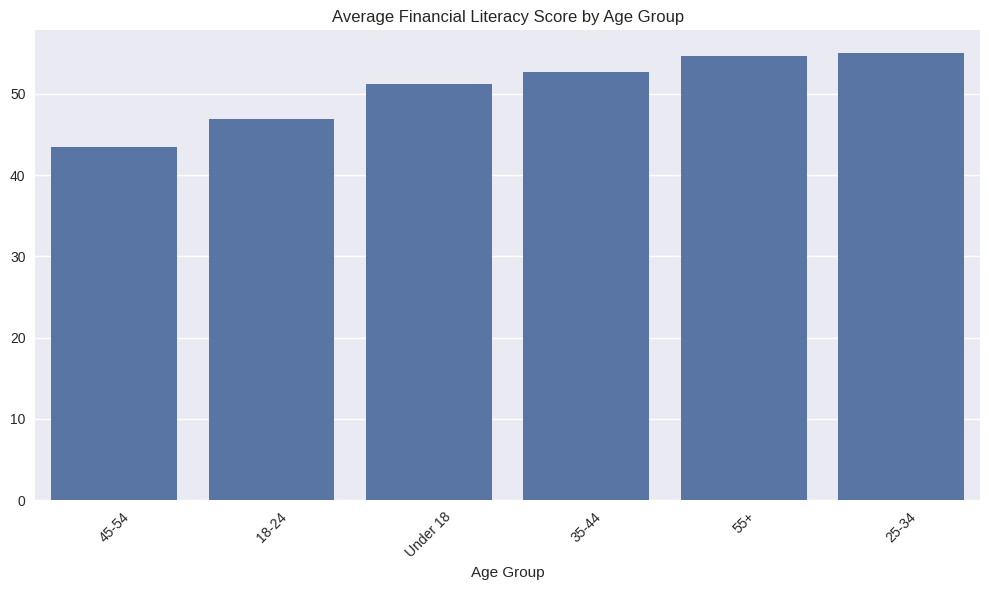

In [18]:
#create a graph of the age group and financial literacy score
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
# I use the original DataFrame (dataframes) which contains 'Age Group' and 'Financial Literacy Score'
avg_by_age = dataframes['Financial Literacy Score'].groupby(dataframes['Age Group']).mean().sort_values()
sns.barplot(x=avg_by_age.index, y=avg_by_age.values)
plt.title('Average Financial Literacy Score by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

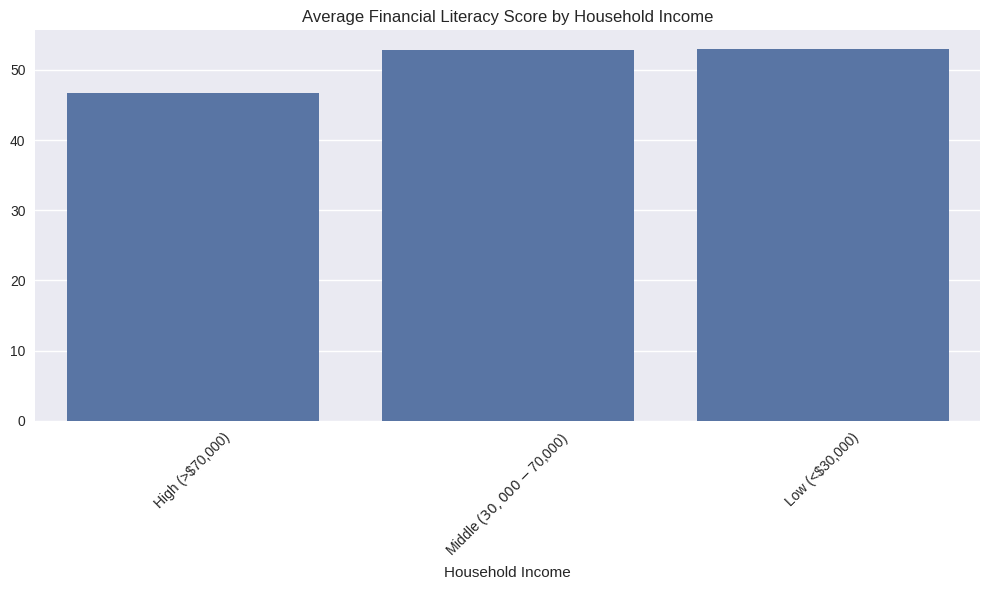

In [19]:

# draw a graph for 'Household Income' and 'Financial Literacy Score'
plt.figure(figsize=(10, 6))
avg_by_income = dataframes.groupby('Household Income')['Financial Literacy Score'].mean().sort_values()
sns.barplot(x=avg_by_income.index, y=avg_by_income.values)
plt.title('Average Financial Literacy Score by Household Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
print("Summary Statistics by Location:")
# Use the original DataFrame (dataframes) for grouping by 'Location'
df= (dataframes.groupby('Location')['Financial Literacy Score'].describe())
df.head()

Summary Statistics by Location:


,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Rural,28.0,50.142857,34.603269,0.0,12.75,54.5,78.75,97.0
Suburban,38.0,53.868421,28.130171,2.0,28.00,57.5,73.75,95.0
Urban,30.0,49.033333,32.199254,2.0,22.50,53.0,75.25,98.0
